# Heart disease prediction

## Project description

## Dataset description

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

#### Columns description

1. age - The person’s age in years
2. sex - The person’s sex: 1 = male, 0 = female
3. cp - chest pain type (4 values): 0 = asymptomatic, 1 = atypical angina, 2 = non-angina pain, 3 = typical angina
4. trestbps - resting blood pressure (in min Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - fasting blood sugar > 120 mg/dl: 1 = true, 0 = false
7. restecg - resting electrocardiographic results (3 values): 0 - showing probable or definite left ventricular hypertrophy by Estes’ criteria, 1 = normal, 2 = having ST-T wave abnormality
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina: 1 = yes, 0 = no
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment: 0 = downsloping, 1 = flat, 2 = uploping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - a blood disorder called thalassemia: 0 = NULL (dropped from the dataset previously), 1 = fixed defect (no blood flow in some part of the heart), 2 = normal blood flow, 3 = reversible defect (a blood flow is observed but it is not normal)


## Dependencies loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from pathlib import Path

## Project setup

In [2]:
raw_input_data_path = "../data/input"
preprocessed_output_data_path = "../data/output"

## Data preparation

### Data loading

In [3]:
df = pd.read_csv(f"{raw_input_data_path}/heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Shape of dataset

In [6]:
df.shape

(1025, 14)

### Data processing

#### encode the features into categorical variables

In [7]:
# converting features to categorical features 

df['cp'][df['cp'] == 0] = 'asymptomatic'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'typical angina'

df['fbs'][df['fbs'] == 0] = 'false'
df['fbs'][df['fbs'] == 1] = 'true'

df['restecg'][df['restecg'] == 0] = 'left ventricular hypertrophy'
df['restecg'][df['restecg'] == 1] = 'normal'
df['restecg'][df['restecg'] == 2] = 'ST-T wave abnormality'

df['slope'][df['slope'] == 0] = 'downsloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'upsloping'

df['thal'][df['thal'] == 0] = 'null'
df['thal'][df['thal'] == 1] = 'fixed defect'
df['thal'][df['thal'] == 2] = 'normal'
df['thal'][df['thal'] == 3] = 'reversable defect'

df["sex"] = df.sex.apply(lambda  x:'Male' if x==1 else 'Female')
df["exang"] = df.exang.apply(lambda  x:'yes' if x==1 else 'no')

In [8]:
df['cp'].value_counts()

cp
asymptomatic        497
non-anginal pain    284
atypical angina     167
typical angina       77
Name: count, dtype: int64

In [9]:
df['fbs'].value_counts()

fbs
false    872
true     153
Name: count, dtype: int64

In [10]:
df['restecg'].value_counts()

restecg
normal                          513
left ventricular hypertrophy    497
ST-T wave abnormality            15
Name: count, dtype: int64

In [11]:
df['slope'].value_counts()

slope
flat           482
upsloping      469
downsloping     74
Name: count, dtype: int64

In [12]:
df['thal'].value_counts()

thal
normal               544
reversable defect    410
fixed defect          64
null                   7
Name: count, dtype: int64

In [13]:
#dropping row with thal is null
df.drop(df[df.thal =='null'].index, inplace=True)
#checking distribution
df['thal'].value_counts()

thal
normal               544
reversable defect    410
fixed defect          64
Name: count, dtype: int64

In [14]:
df['sex'].value_counts()

sex
Male      709
Female    309
Name: count, dtype: int64

In [15]:
df['exang'].value_counts()

exang
no     677
yes    341
Name: count, dtype: int64

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,asymptomatic,125,212,false,normal,168,no,1.0,upsloping,2,reversable defect,0
1,53,Male,asymptomatic,140,203,true,left ventricular hypertrophy,155,yes,3.1,downsloping,0,reversable defect,0
2,70,Male,asymptomatic,145,174,false,normal,125,yes,2.6,downsloping,0,reversable defect,0
3,61,Male,asymptomatic,148,203,false,normal,161,no,0.0,upsloping,1,reversable defect,0
4,62,Female,asymptomatic,138,294,true,normal,106,no,1.9,flat,3,normal,0


In [17]:
df.shape

(1018, 14)

### Dataset splitting

Split dataset into train set (80%) and test set (20%).
Test dataset will be used only for the final predictions! We assume that during the entire study they do not have access to it and do not study its statistical properties.

In [18]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 5)

In [19]:
df_train.shape

(814, 14)

In [20]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,56,Male,asymptomatic,132,184,false,left ventricular hypertrophy,105,yes,2.1,flat,1,fixed defect,0
41,54,Male,non-anginal pain,120,258,false,left ventricular hypertrophy,147,no,0.4,flat,0,reversable defect,1
763,58,Female,typical angina,150,283,true,left ventricular hypertrophy,162,no,1.0,upsloping,0,normal,1
826,42,Male,non-anginal pain,130,180,false,normal,150,no,0.0,upsloping,0,normal,1
936,43,Male,non-anginal pain,130,315,false,normal,162,no,1.9,upsloping,1,normal,1


In [21]:
df_test.shape

(204, 14)

In [22]:
Path(preprocessed_output_data_path).mkdir(parents=True, exist_ok=True)

In [23]:
df_train.to_csv(f"{preprocessed_output_data_path}/train.csv")
df_test.to_csv(f"{preprocessed_output_data_path}/test.csv")

## Exploratory Data Analysis (EDA)

### Types of data

Data set includes 7 fetures are object and 6 fetures are numeric

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 166 to 873
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       814 non-null    int64  
 1   sex       814 non-null    object 
 2   cp        814 non-null    object 
 3   trestbps  814 non-null    int64  
 4   chol      814 non-null    int64  
 5   fbs       814 non-null    object 
 6   restecg   814 non-null    object 
 7   thalach   814 non-null    int64  
 8   exang     814 non-null    object 
 9   oldpeak   814 non-null    float64
 10  slope     814 non-null    object 
 11  ca        814 non-null    int64  
 12  thal      814 non-null    object 
 13  target    814 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 95.4+ KB


### Checking the missing value

In [25]:
df_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Summary statistics

In [26]:
# summary statistics of numerical columns
df_train.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,54.734644,132.302211,247.660934,148.916462,1.103686,0.788698,0.506143
std,8.856425,18.006206,53.040846,22.709902,1.195064,1.056612,0.500270
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,212.000000,132.000000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,152.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,278.000000,165.000000,1.800000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000,1.000000


In [27]:
# summary statistics of categorical columns
df_train.describe(include =['O'])

,sex,cp,fbs,restecg,exang,slope,thal
count,814,814,814,814,814,814,814
unique,2,4,2,3,2,3,3
top,Male,asymptomatic,false,normal,no,flat,normal
freq,570,400,686,406,541,386,425


### Distribution of Heart disease (target variable)

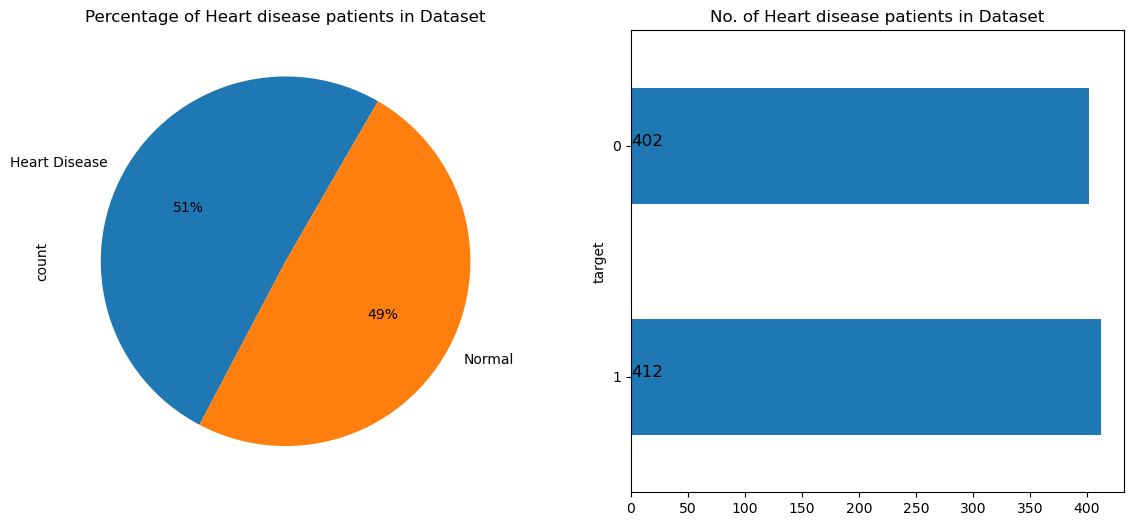

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df_train['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df_train["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df_train["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()





The dataset is balanced having 402 heart disease patients and 412 normal patients

### Checking Gender & Age Distribution

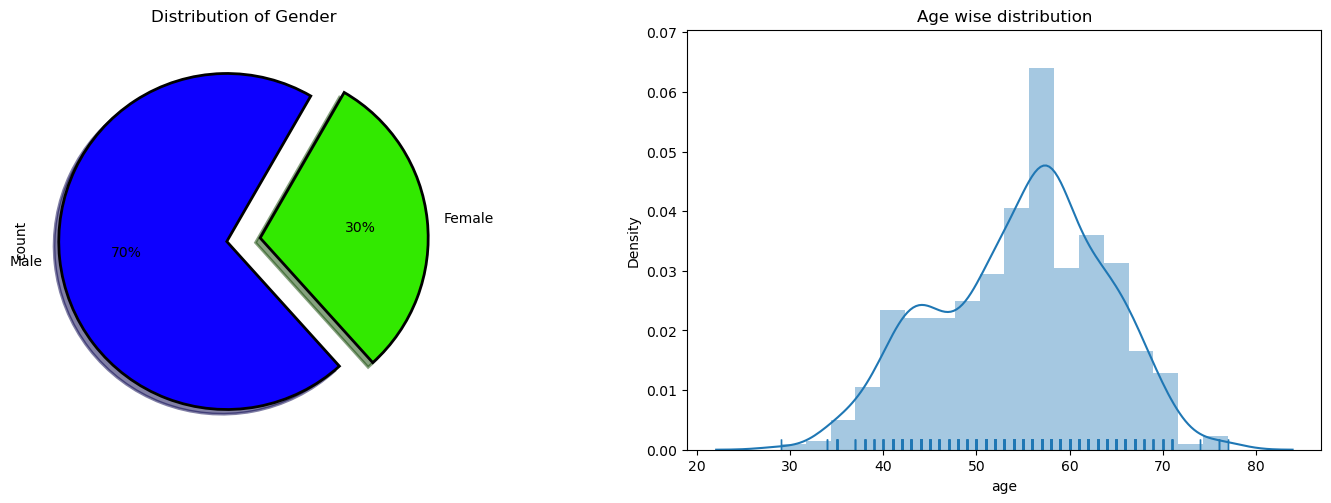

In [29]:
plt.figure(figsize=(18,12))
plt.subplot(221)
df_train["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df_train['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

As we can see from above plot, in this dataset males percentage is way too higher than females where as average age of patients is around 56

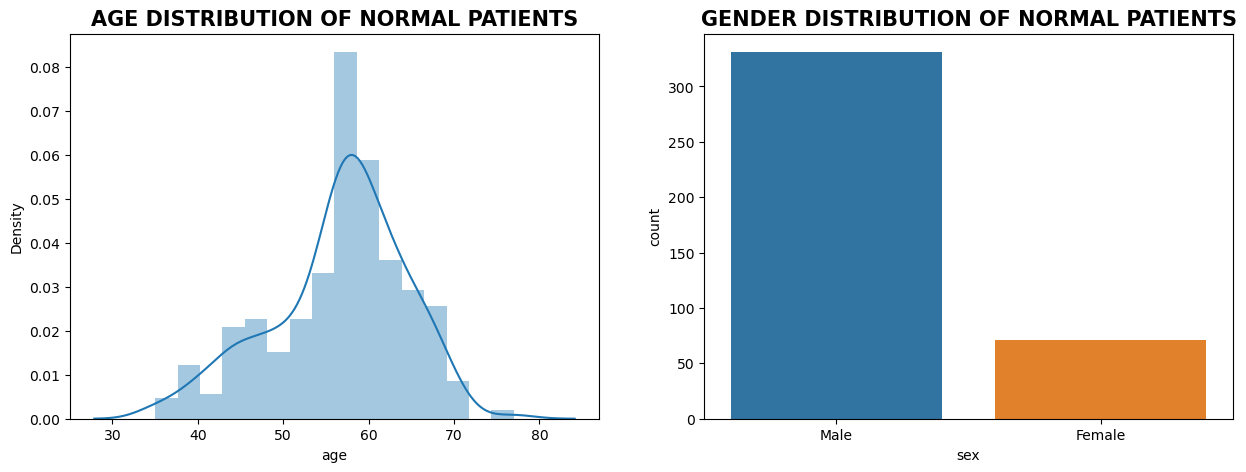

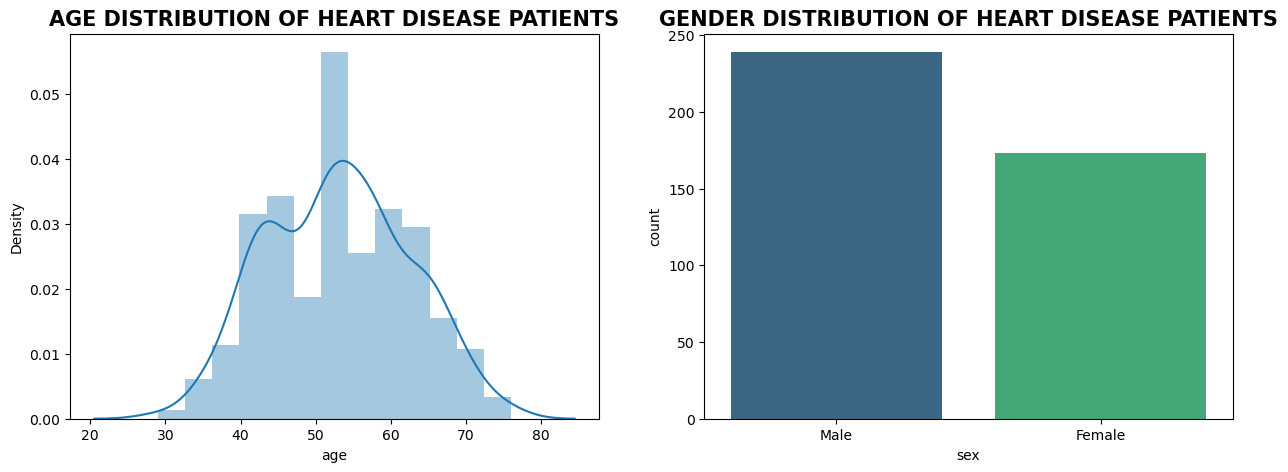

In [30]:
# creating separate df_train for normal and heart patients

attr_1=df_train[df_train['target']==1]

attr_0=df_train[df_train['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0, x = 'sex')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting heart patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'])
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'sex', palette='viridis')
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

More males accounts for heart disease in comparison to females whereas mean age for heart disease patients is around 52 to 54 years

### Distribution of Chest Pain Type

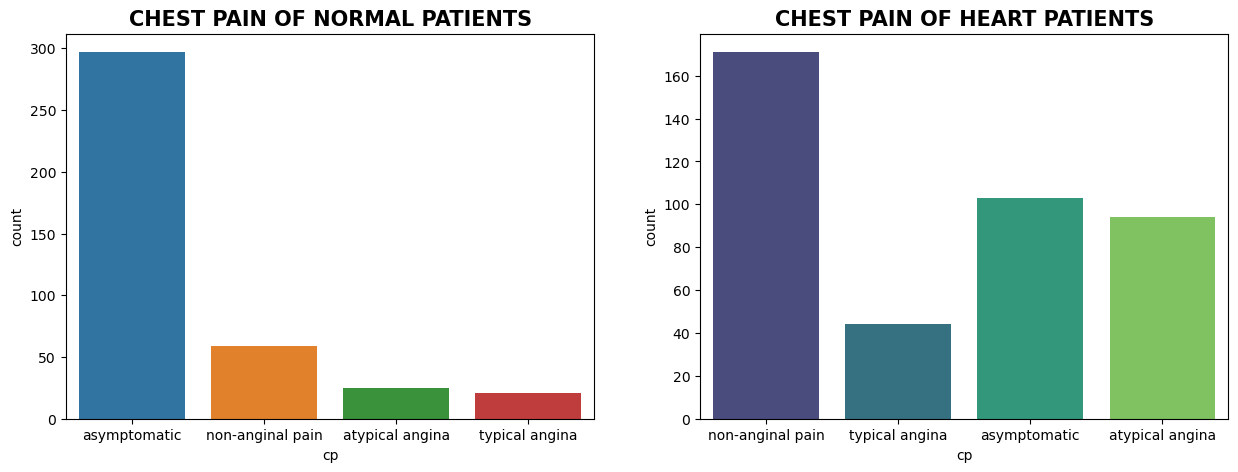

In [31]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'cp')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'cp', palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [32]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['cp', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
cp,,
asymptomatic,73.880000,25.000000
atypical angina,6.220000,22.820000
non-anginal pain,14.680000,41.500000
typical angina,5.220000,10.680000


As we can see from above plot 41.5% of the chest pain type of the heart disease patients have non-anginal pain.

### Distribution of fasting blood sugar

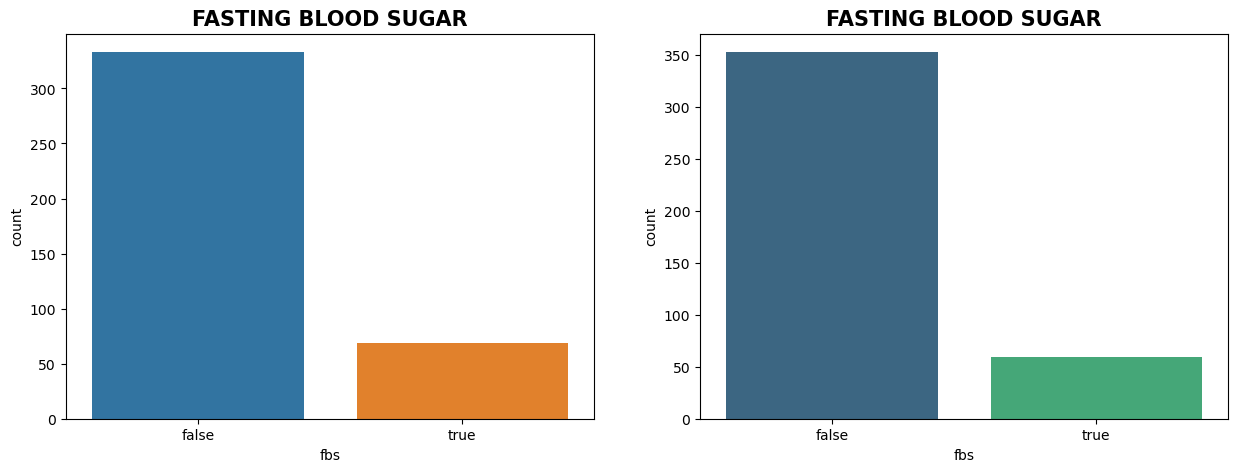

In [33]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'fbs')
plt.title('FASTING BLOOD SUGAR', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'fbs', palette='viridis')
plt.title('FASTING BLOOD SUGAR', fontsize=15, weight='bold' )
plt.show()

In [34]:
#Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['fbs', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
fbs,,
false,82.840000,85.680000
true,17.160000,14.320000


### Distribution of Rest ECG

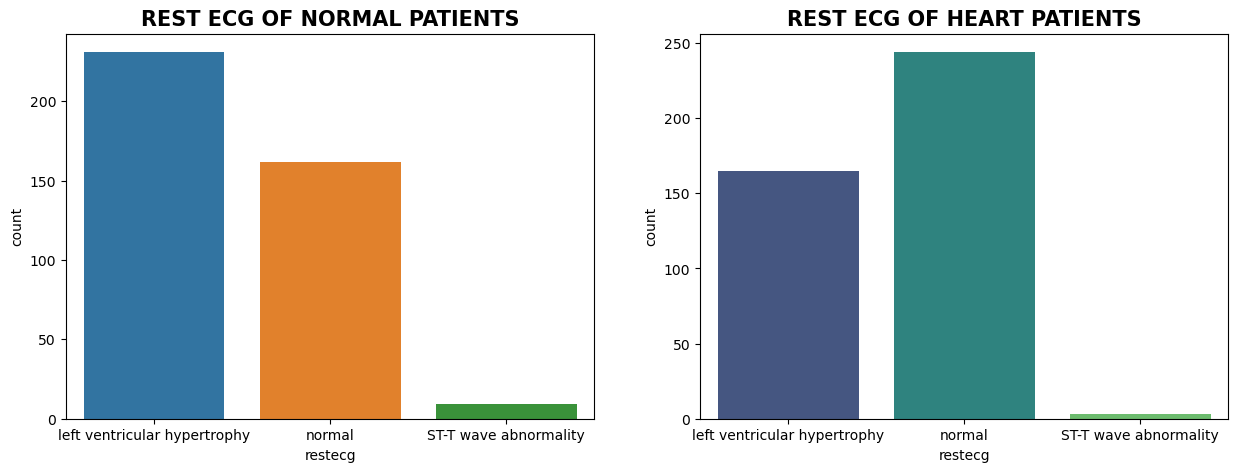

In [35]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'restecg')
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'restecg', palette='viridis')
plt.title('REST ECG OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [36]:
#Exploring the Heart Disease patients based on REST ECG
plot_criteria= ['restecg', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
restecg,,
ST-T wave abnormality,2.240000,0.730000
left ventricular hypertrophy,57.460000,40.050000
normal,40.300000,59.220000


An electrocardiogram records the electrical signals in your heart. It's a common test used to detect heart problems and monitor the heart's status in many situations. Electrocardiograms — also called ECGs or EKGs. but ECG has limits. It measures heart rate and rhythm—but it doesn’t necessarily show blockages in the arteries.Thats why in this dataset around 59% heart disease patients have normal ECG

### Distribution of ST Slope

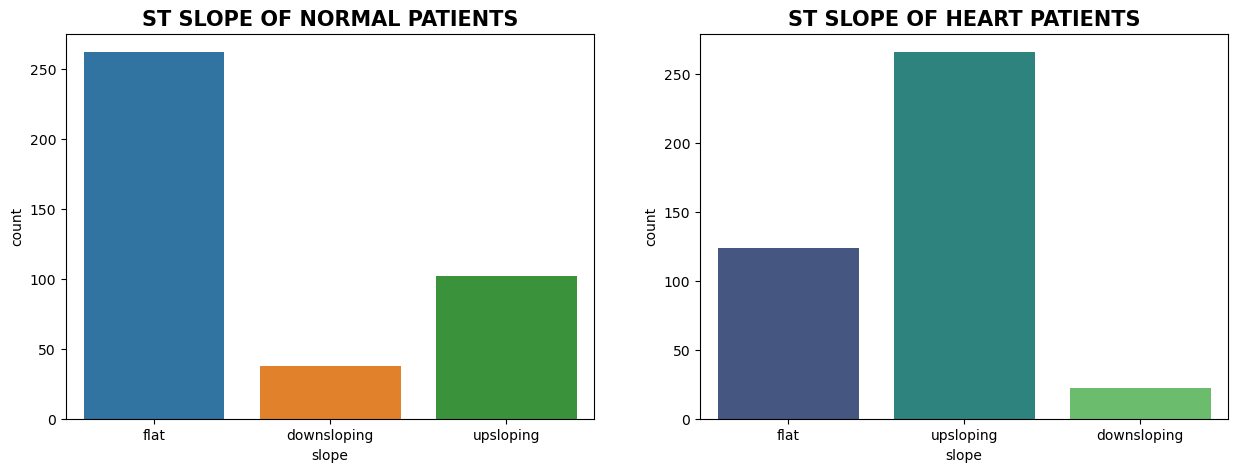

In [37]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(attr_0, x = 'slope')
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1, x = 'slope', palette='viridis')
plt.title('ST SLOPE OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [38]:
#Exploring the Heart Disease patients based on ST Slope
plot_criteria= ['slope', 'target']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df_train[plot_criteria[0]], df_train[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

target,0,1
slope,,
downsloping,9.450000,5.340000
flat,65.170000,30.100000
upsloping,25.370000,64.560000


Flat is positive sign as 65.17% of the normal patients have flat sloping where as 64.56% heart patients have upsloping.

### Distribution of Numerical features

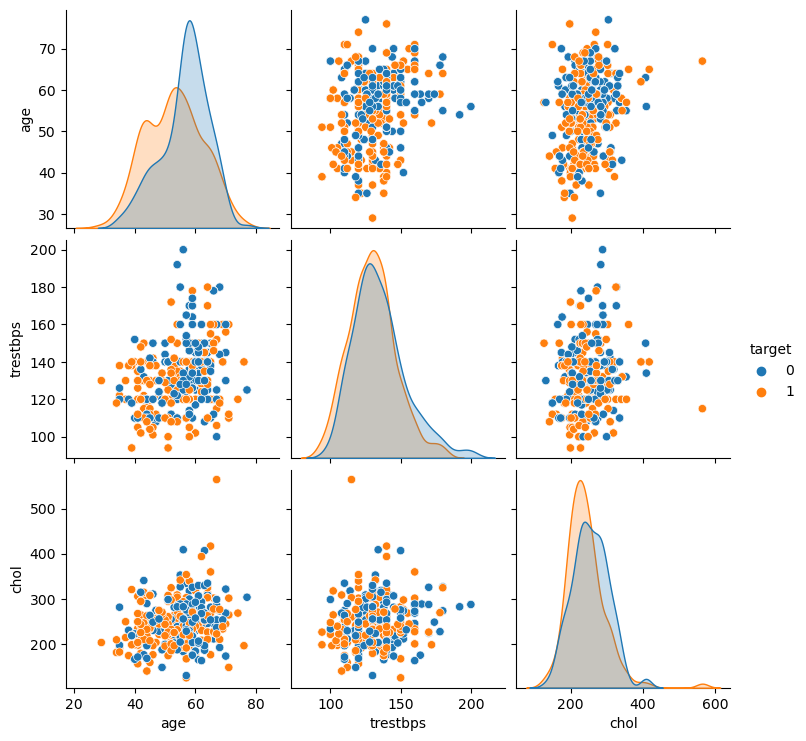

In [39]:
sns.pairplot(df_train, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

It seems age may impact chances of heart disease

<Axes: xlabel='trestbps', ylabel='chol'>

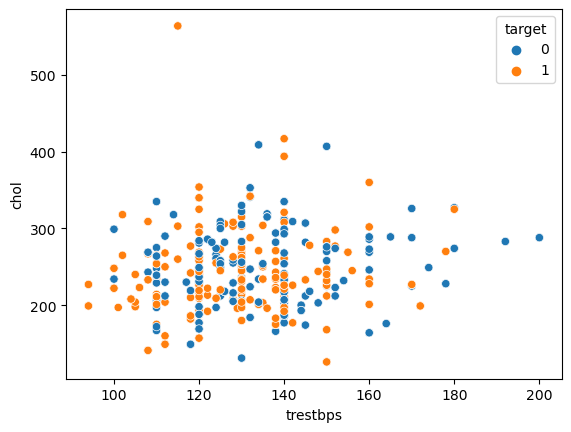

In [40]:
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = df_train)

<Axes: xlabel='trestbps', ylabel='age'>

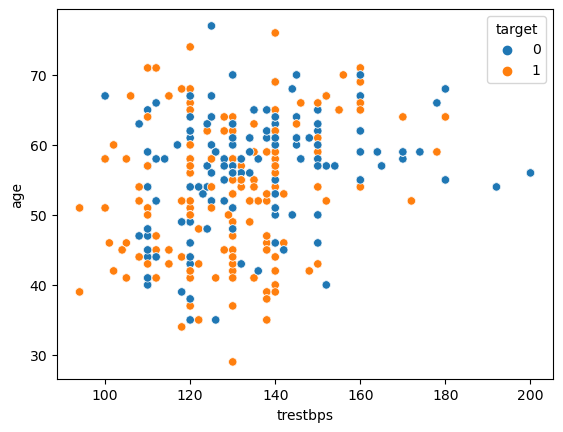

In [41]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = df_train)

<Axes: xlabel='ca', ylabel='count'>

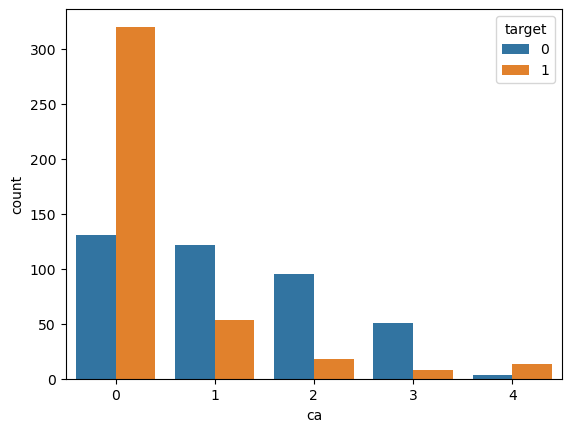

In [42]:
sns.countplot(x = 'ca', hue = 'target', data = df_train)

It seems low number of major vessels may be associated with a high risk of heart disease